In [1]:
import numpy as np
import emcee
import scipy
import scipy.optimize
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import dlsfunctions as dls

In [2]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [3]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

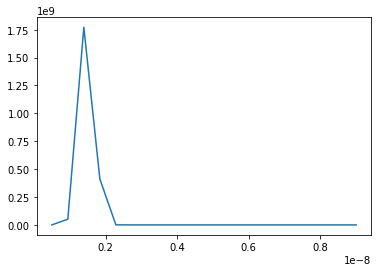

In [4]:
plt.plot(d, f_1)

In [31]:
mean

1.487921647029171e-09

In [5]:
theta_input = np.append(f_1, beta)

In [6]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

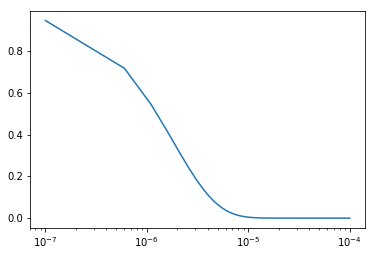

In [7]:
plt.semilogx(time_in, simulated_data)

In [8]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [9]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [10]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [11]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


array([0.28133333, 0.27866667, 0.28466667, 0.28666667, 0.28333333,
       0.28533333, 0.287     , 0.27266667, 0.26433333, 0.274     ,
       0.291     , 0.29666667, 0.293     , 0.28966667, 0.27433333,
       0.26766667, 0.278     , 0.26866667, 0.26466667, 0.27033333,
       0.27366667, 0.272     , 0.256     , 0.273     , 0.27833333,
       0.28      , 0.26966667, 0.27966667, 0.283     , 0.277     ,
       0.27766667, 0.275     , 0.27433333, 0.27866667, 0.27533333,
       0.28033333, 0.28233333, 0.27566667, 0.28      , 0.275     ,
       0.246     , 0.28233333, 0.28766667, 0.27766667, 0.27966667,
       0.288     , 0.269     , 0.26833333, 0.285     , 0.28233333,
       0.274     , 0.271     , 0.286     , 0.28366667, 0.28533333,
       0.28433333, 0.271     , 0.27666667, 0.27133333, 0.26366667,
       0.29033333, 0.26866667, 0.29033333, 0.28233333, 0.286     ,
       0.29833333, 0.295     , 0.28666667, 0.273     , 0.27133333,
       0.268     , 0.283     , 0.258     , 0.27866667, 0.28166

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


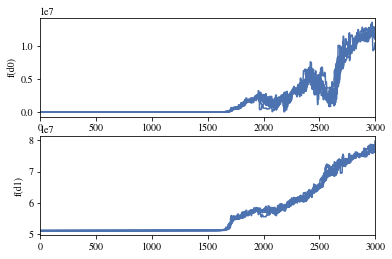

In [12]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

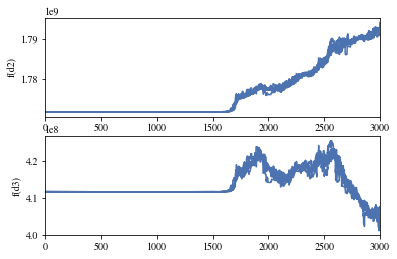

In [13]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [32]:
samples = sampler.chain[:,2700:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta':traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [33]:
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,0.094552,9.053127e+06,7.345426e+07,3.601541e+07,7.300484e+06,4.330779e+07,6.031844e+05,7.206059e+06,6.527041e+05,3.763041e+06,...,2.372683e+07,9.652180e+06,1.789531e+09,4.062779e+08,1.252191e+06,1.560730e+06,1.409972e+07,429557.040832,1.306667e+07,1.422860e+07
0.50,0.229876,1.101122e+07,7.526631e+07,4.132436e+07,8.036245e+06,4.748745e+07,1.302362e+06,7.948589e+06,1.099327e+06,4.433350e+06,...,2.542661e+07,1.091221e+07,1.790388e+09,4.081808e+08,1.905196e+06,2.091491e+06,1.604129e+07,617457.875179,1.598036e+07,1.651179e+07
0.84,0.591734,1.177598e+07,7.659888e+07,4.722770e+07,8.774580e+06,5.140003e+07,1.912999e+06,8.669927e+06,2.026195e+06,4.931724e+06,...,2.799154e+07,1.316804e+07,1.791373e+09,4.124999e+08,3.302200e+06,2.663343e+06,1.768046e+07,959968.644535,1.784341e+07,1.831563e+07


In [16]:
beta_16 = 0.0945
beta_50 = 0.2298
beta_84 = 0.5917

In [19]:
fifty_q = np.zeros(20)
fifty_q[0] = 1.101e7
fifty_q[1] = 7.5266e7
fifty_q[2] = 1.7904e9
fifty_q[3] = 4.0818e8
fifty_q[4] = 1.9052e6
fifty_q[5] = 2.0915e6
fifty_q[6] = 1.604e7
fifty_q[7] = 617457.9
fifty_q[8] = 1.598e7
fifty_q[9] = 1.6512e7
fifty_q[10] = 4.132e7
fifty_q[11] = 8.036e6
fifty_q[12] = 4.7487e7
fifty_q[13] = 1.302e6
fifty_q[14] = 7.9485e6
fifty_q[15] = 1.0993e6
fifty_q[16] = 4.433e6
fifty_q[17] = 1.978e7
fifty_q[18] = 2.543e7
fifty_q[19] = 1.0912e7

Text(0.5,1,'Inferred particle size distribution')

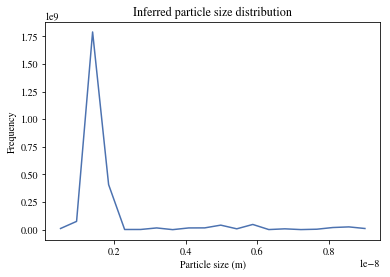

In [23]:
plt.plot(d, fifty_q)
plt.xlabel('Particle size (m)')
plt.ylabel('Frequency')
plt.title('Inferred particle size distribution')

Text(0.5,1,'Actual simulated particle size distribution')

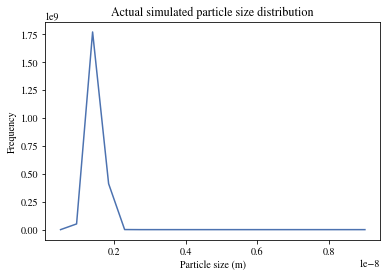

In [22]:
plt.plot(d, f_1)
plt.xlabel('Particle size (m)')
plt.ylabel('Frequency')
plt.title('Actual simulated particle size distribution')

In [24]:
g2_from_inference_beta16 = dls.g2(np.append(fifty_q, beta_16), d, m, gamma, time_in)
g2_from_inference_beta50 = dls.g2(np.append(fifty_q, beta_50), d, m, gamma, time_in)
g2_from_inference_beta84 = dls.g2(np.append(fifty_q, beta_84), d, m, gamma, time_in)

Text(0,0.5,'Intensity')

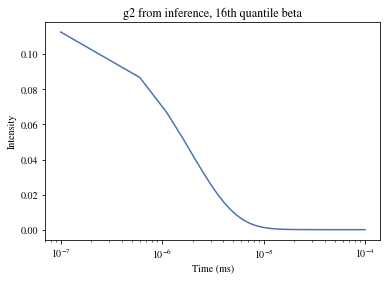

In [25]:
plt.semilogx(time_in, g2_from_inference_beta16)
plt.title('g2 from inference, 16th quantile beta')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')

Text(0,0.5,'Intesity')

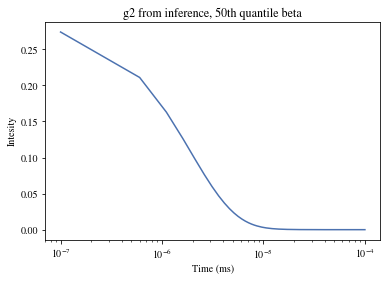

In [26]:
plt.semilogx(time_in, g2_from_inference_beta50)
plt.title('g2 from inference, 50th quantile beta')
plt.xlabel('Time (ms)')
plt.ylabel('Intesity')

Text(0,0.5,'Intensity')

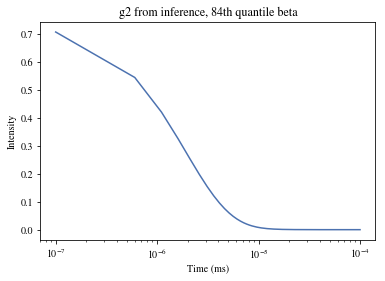

In [27]:
plt.semilogx(time_in, g2_from_inference_beta84)
plt.title('g2 from inference, 84th quantile beta')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')

Text(0.5,0,'Time (ms)')

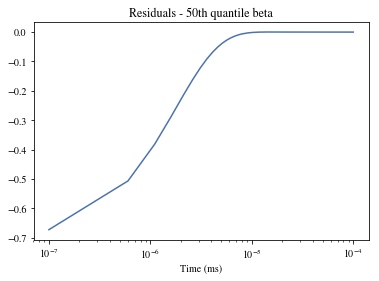

In [28]:
plt.semilogx(time_in, g2_from_inference_beta50 - simulated_data)
plt.title('Residuals - 50th quantile beta')
plt.xlabel('Time (ms)')

Text(0.5,0,'Time (ms)')

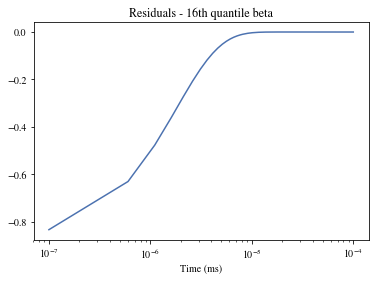

In [29]:
plt.semilogx(time_in, g2_from_inference_beta16 - simulated_data)
plt.title('Residuals - 16th quantile beta')
plt.xlabel('Time (ms)')

Text(0.5,0,'Time (ms)')

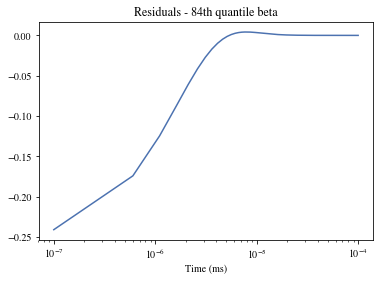

In [30]:
plt.semilogx(time_in, g2_from_inference_beta84 - simulated_data)
plt.title('Residuals - 84th quantile beta')
plt.xlabel('Time (ms)')